In [ ]:
#Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: 
#   колонки из самих файлов (product_id, quantity), а также имя пользователя (name)
#   и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)
#Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую 
#   с пробелом и в алфавитном порядке.
#Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. 
#Сколько было продано единиц товара с product_id==56?
#Визуализируйте продажи по дням.
#Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
#Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [34]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = 'shared/homeworks/python_ds_miniprojects/4/data/2020-12-03/Alexey_Smirnov/data.csv'

In [4]:
df_0 = pd.read_csv(path)
df_0.head()

,Unnamed: 0,product_id,quantity
0,0,47,1
1,1,57,1
2,2,14,2
3,3,52,1
4,4,1,4


## Добавляем во все датафреймы колонки name, date:

In [5]:
path_0 = 'shared/homeworks/python_ds_miniprojects/4/data/'

list_of_date_folders = os.listdir(path_0)
list_of_date_folders

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [8]:
dic = {}

for date_folder in list_of_date_folders:
    names = os.listdir(path_0 + date_folder)
    dic[date_folder] = names
    #print(names)

dic   

{'2020-12-05': ['Petr_Ivanov',
  'Petr_Smirnov',
  'Rostislav_Smirnov',
  'Kirill_Smirnov',
  'Alexey_Fedorov',
  'Alexey_Petrov'],
 '2020-12-08': ['Petr_Petrov',
  'Rostislav_Petrov',
  'Kirill_Smirnov',
  'Alexey_Fedorov',
  'Anton_Smirnov'],
 '2020-12-09': ['Alexey_Smirnov',
  'Anton_Petrov',
  'Rostislav_Petrov',
  'Anton_Smirnov',
  'Anton_Ivanov',
  'Petr_Fedorov',
  'Vasiliy_Ivanov'],
 '2020-12-04': ['Kirill_Fedorov',
  'Alexey_Smirnov',
  'Rostislav_Ivanov',
  'Petr_Ivanov',
  'Rostislav_Fedorov',
  'Petr_Smirnov',
  'Rostislav_Smirnov',
  'Petr_Fedorov',
  'Vasiliy_Ivanov'],
 '2020-12-06': ['Vasiliy_Fedorov'],
 '2020-12-03': ['Alexey_Smirnov',
  'Anton_Petrov',
  'Vasiliy_Petrov',
  'Kirill_Petrov',
  'Petr_Fedorov',
  'Vasiliy_Ivanov'],
 '2020-12-07': ['Kirill_Fedorov',
  'Alexey_Smirnov',
  'Rostislav_Fedorov',
  'Alexey_Ivanov',
  'Petr_Smirnov',
  'Alexey_Fedorov',
  'Anton_Smirnov',
  'Anton_Ivanov',
  'Petr_Fedorov',
  'Vasiliy_Ivanov']}

In [11]:
for date in dic.keys():
    os.mkdir(date)
    for name in dic[date]:
        os.mkdir(date + '/' + name)
        file_path = path_0 + date + '/' + name + '/' + 'data.csv'
        df = pd.read_csv(file_path)
        df['name'] = name
        df['date'] = date
        path_to_save = date + '/' + name + '/' + 'data_1.csv'
        df.to_csv(path_to_save, index=False)

## Соединяем датафреймы в один:

In [16]:
df_total = pd.DataFrame()

for date in dic.keys():
    for name in dic[date]:
        path = date + '/' + name + '/' + 'data_1.csv'
        df = pd.read_csv(path)
        df_total = df_total.append(df)

df_total.shape

(161, 5)

In [22]:
df_total = df_total.reset_index(drop=True).drop(columns = 'Unnamed: 0')
df_total.head(10)

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
5,55,3,Petr_Smirnov,2020-12-05
6,49,3,Petr_Smirnov,2020-12-05
7,22,5,Petr_Smirnov,2020-12-05
8,83,4,Petr_Smirnov,2020-12-05
9,66,2,Rostislav_Smirnov,2020-12-05


In [23]:
df_total.quantity.sum()

480

In [25]:
df_total.groupby('name', as_index=False).agg({'quantity' : 'sum'}).sort_values('quantity', ascending=False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [28]:
top_10 = df_total.groupby('product_id', as_index=False) \
                .agg({'quantity' : 'sum'}) \
                .sort_values('quantity', ascending=False) \
                .head(10)
top_10

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


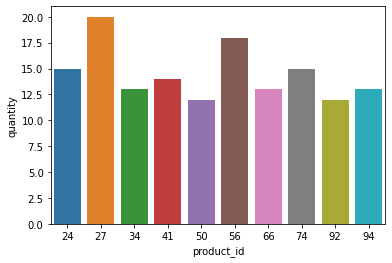

In [30]:
ax = sns.barplot(x='product_id', y='quantity', data = top_10)

## Продажи по дням:

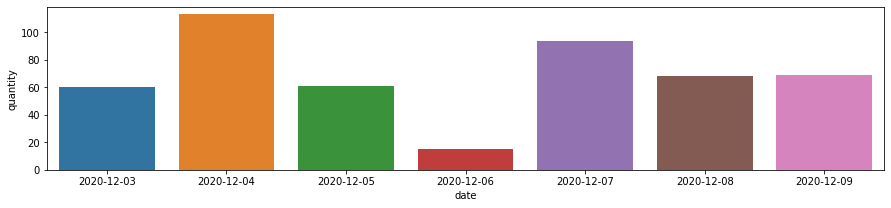

In [36]:
plt.figure(figsize=(15, 3))
top_days = df_total.groupby('date', as_index=False) \
                .agg({'quantity' : 'sum'}) \
                .sort_values('date')
ax = sns.barplot(x='date', y='quantity', data = top_days)

In [39]:
purch = df_total[['product_id', 'name', 'date']]
purch 

,product_id,name,date
0,27,Petr_Ivanov,2020-12-05
1,89,Petr_Ivanov,2020-12-05
2,33,Petr_Ivanov,2020-12-05
3,8,Petr_Ivanov,2020-12-05
4,16,Petr_Ivanov,2020-12-05
...,...,...,...
156,18,Petr_Fedorov,2020-12-07
157,94,Petr_Fedorov,2020-12-07
158,95,Vasiliy_Ivanov,2020-12-07
159,83,Vasiliy_Ivanov,2020-12-07


In [40]:
purch_no_duplicates = purch.drop_duplicates()
purch_no_duplicates

,product_id,name,date
0,27,Petr_Ivanov,2020-12-05
1,89,Petr_Ivanov,2020-12-05
2,33,Petr_Ivanov,2020-12-05
3,8,Petr_Ivanov,2020-12-05
4,16,Petr_Ivanov,2020-12-05
...,...,...,...
156,18,Petr_Fedorov,2020-12-07
157,94,Petr_Fedorov,2020-12-07
158,95,Vasiliy_Ivanov,2020-12-07
159,83,Vasiliy_Ivanov,2020-12-07


In [42]:
purch.loc[purch.duplicated()]

,product_id,name,date
48,55,Alexey_Smirnov,2020-12-09


In [44]:
distr = purch_no_duplicates.groupby(['name', 'product_id'], as_index=False).agg({'date' : 'count'})
distr

,name,product_id,date
0,Alexey_Fedorov,13,1
1,Alexey_Fedorov,15,1
2,Alexey_Fedorov,18,1
3,Alexey_Fedorov,34,1
4,Alexey_Fedorov,50,1
...,...,...,...
153,Vasiliy_Ivanov,83,1
154,Vasiliy_Ivanov,94,1
155,Vasiliy_Ivanov,95,1
156,Vasiliy_Petrov,27,1


In [45]:
distr[distr.date > 1]

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
